In [8]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit plotly


In [11]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Recommendation
from sklearn.metrics.pairwise import cosine_similarity


In [14]:
print("Dataset shape:", df.shape)
df.head()
df.info()


Dataset shape: (11119, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [15]:
df['authors'] = df['authors'].str.strip()


In [16]:
df['publication_year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year
df['book_age'] = 2025 - df['publication_year']  # assuming current year = 2025


In [17]:
df.isnull().sum()


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      2
book_age              2
dtype: int64

In [18]:
df['book_age'] = df['book_age'].fillna(df['book_age'].median())


In [19]:
author_stats = df.groupby('authors').agg({
    'average_rating':'mean',
    'ratings_count':'sum',
    'bookID':'count'
}).rename(columns={'bookID':'num_books'}).reset_index()

df = df.merge(author_stats, on='authors', how='left', suffixes=('','_author'))

df['author_influence'] = (df['average_rating_author']*0.5 +
                          np.log1p(df['ratings_count_author'])*0.3 +
                          np.log1p(df['num_books'])*0.2)


In [20]:
# ==============================================
# Step 0: Import Libraries
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity

# Optional: Plotly for interactive visualization
import plotly.express as px


In [21]:
# ==============================================
# Step 1: Load Dataset safely
# ==============================================
import os
os.chdir(r"D:/projectB")  # Change to your folder containing CSV
print("Current Working Directory:", os.getcwd())

# Load CSV safely, skip malformed lines
df = pd.read_csv(
    "books.csv",
    engine='python',
    on_bad_lines='skip',
    quotechar='"',
    encoding='utf-8'
)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Current Working Directory: D:\projectB
Dataset loaded successfully!
Shape: (11119, 12)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [22]:
# ==============================================
# Step 2: Data Cleaning
# ==============================================
# Strip extra spaces in author names
df['authors'] = df['authors'].str.strip()

# Extract publication year
df['publication_year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year
df['book_age'] = 2025 - df['publication_year']  # assuming current year = 2025

# Check for missing values
print(df.isnull().sum())

# Fill missing book_age if any
df['book_age'] = df['book_age'].fillna(df['book_age'].median())


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      2
book_age              2
dtype: int64


In [23]:
# ==============================================
# Step 3: Feature Engineering
# ==============================================
# Author stats
author_stats = df.groupby('authors').agg({
    'average_rating':'mean',
    'ratings_count':'sum',
    'bookID':'count'
}).rename(columns={'bookID':'num_books'}).reset_index()

df = df.merge(author_stats, on='authors', how='left', suffixes=('','_author'))

# Author Influence Score
df['author_influence'] = (df['average_rating_author']*0.5 +
                          np.log1p(df['ratings_count_author'])*0.3 +
                          np.log1p(df['num_books'])*0.2)

# Publisher stats
publisher_stats = df.groupby('publisher')['average_rating'].mean().reset_index()
publisher_stats.rename(columns={'average_rating':'publisher_influence'}, inplace=True)
df = df.merge(publisher_stats, on='publisher', how='left')

# Display updated dataset
df[['title','authors','average_rating','author_influence','publisher_influence','book_age']].head()


,title,authors,average_rating,author_influence,publisher_influence,book_age
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,7.464625,4.059231,19.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,7.464625,4.059231,21.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,6.121552,3.975758,22.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,7.464625,4.059231,21.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,7.464625,3.975758,21.0


In [24]:
# ==============================================
# Step 4: Define Features & Target
# ==============================================
features = ['ratings_count','text_reviews_count','author_influence','book_age','publisher_influence']
X = df[features]
y = df['average_rating']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# ==============================================
# Step 5: Train ML Model - Random Forest Regressor
# ==============================================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# For sklearn >=1.4
rmse = root_mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}, R2: {r2:.3f}")



RMSE: 0.203, R2: 0.637


ratings_count: 0.125
text_reviews_count: 0.069
author_influence: 0.460
book_age: 0.045
publisher_influence: 0.300


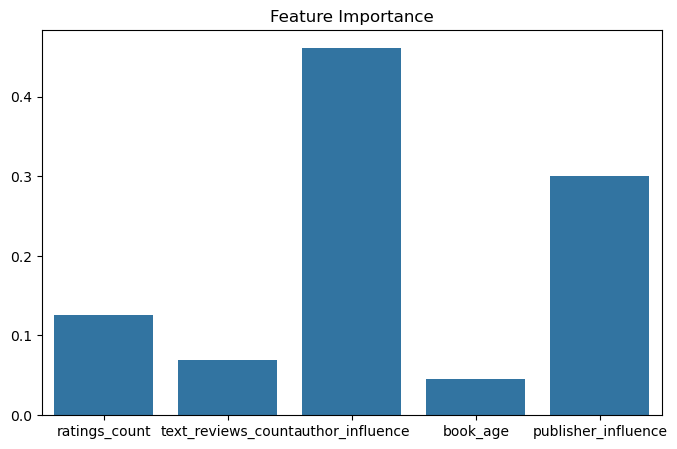

In [26]:
# ==============================================
# Step 6: Feature Importance
# ==============================================
importances = rf.feature_importances_
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.3f}")

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance")
plt.show()


In [27]:
# ==============================================
# Step 7: Popularity Classification (Optional)
# ==============================================
df['popular'] = df['average_rating'].apply(lambda x:1 if x>4 else 0)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, df.loc[X_train.index,'popular'])

y_class_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(df.loc[X_test.index,'popular'], y_class_pred))
print("F1 Score:", f1_score(df.loc[X_test.index,'popular'], y_class_pred))


Classification Accuracy: 0.752248201438849
F1 Score: 0.6923506420993858


In [28]:
# ==============================================
# Step 8: Content-Based Book Recommendation
# ==============================================
book_features = df[features].values
similarity_matrix = cosine_similarity(book_features)

def recommend_books(book_title, top_n=5):
    if book_title not in df['title'].values:
        return "Book not found"
    idx = df.index[df['title']==book_title][0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)[1:top_n+1]
    return [df.iloc[i[0]]['title'] for i in sim_scores]

# Test
recommend_books("The Hobbit")


['Landing',
 'Sula',
 'Missing Mom',
 'Her Smoke Rose Up Forever',
 'Rape: A Love Story']

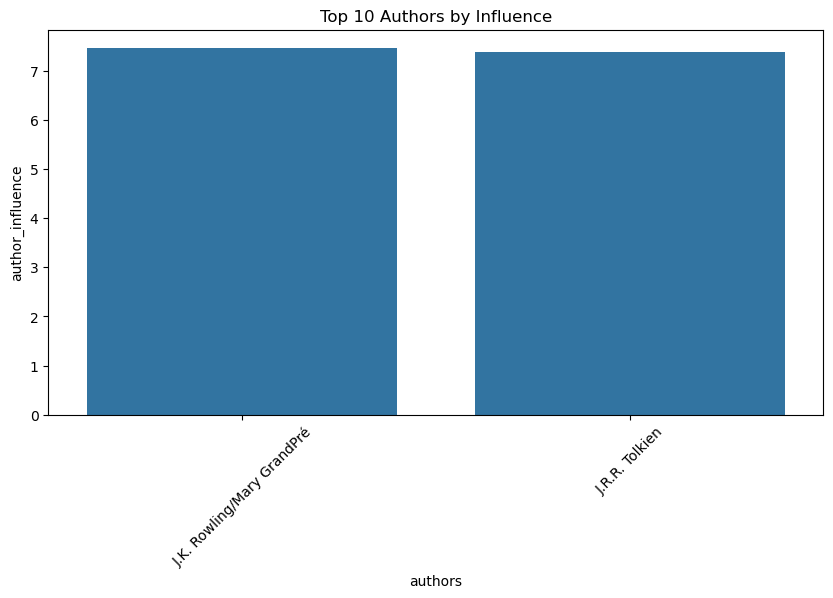

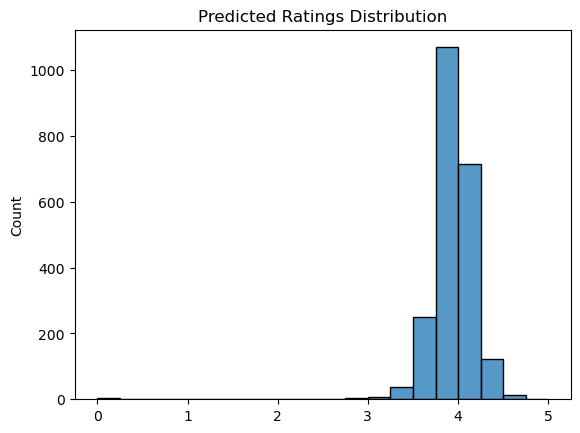

In [29]:
# ==============================================
# Step 9: Visualizations
# ==============================================
# Top 10 authors by influence
top_authors = df.sort_values('author_influence',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='authors', y='author_influence', data=top_authors)
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Influence")
plt.show()

# Predicted ratings distribution
sns.histplot(y_pred, bins=20)
plt.title("Predicted Ratings Distribution")
plt.show()


In [32]:
# ==============================================
# Step 10: Save Cleaned & Feature-Engineered Data
# ==============================================
df.to_csv("books_cleaned_featured.csv", index=False)
print("Cleaned dataset saved for future use!")


Cleaned dataset saved for future use!


In [49]:
import joblib
import os

# Create a folder for models if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the regression model
joblib.dump(rf, "models/rf_regressor.pkl")

# Save the classification model
joblib.dump(clf, "models/rf_classifier.pkl")


['models/rf_classifier.pkl']

In [1]:
import os
os.listdir("D:/projectB/models")


['rf_classifier.pkl', 'rf_regressor.pkl']

In [3]:
print([name for name in globals() if 'RandomForest' in str(type(globals()[name]))])


[]


In [32]:
import joblib
import os
from sklearn.metrics.pairwise import cosine_similarity

os.makedirs("models", exist_ok=True)  # create folder if not exists

# Save the trained models
joblib.dump(rf, "models/rf_regressor.pkl")    # rf is your trained regressor
joblib.dump(clf, "models/rf_classifier.pkl") # clf is your trained classifier

# Precompute similarity matrix once and save
similarity_matrix = cosine_similarity(df[features].values)
joblib.dump(similarity_matrix, "models/similarity_matrix.pkl")


['models/similarity_matrix.pkl']